# 03 - Exploratory Data Analysis (EDA)

## 1. Load Cleaned Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from src.eda import plot_univariate, plot_bivariate, plot_correlation_matrix

df = pd.read_csv('../data/processed/credit_card_default_cleaned.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. Univariate Analysis
Explore the distribution of key features.


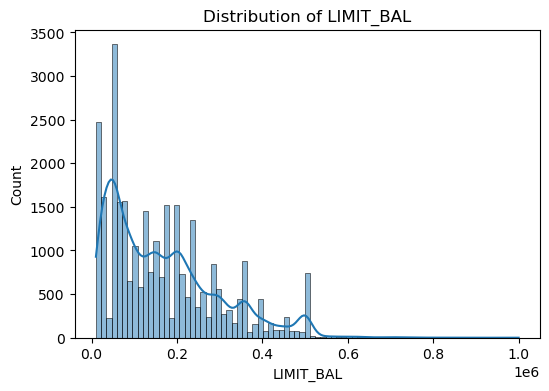

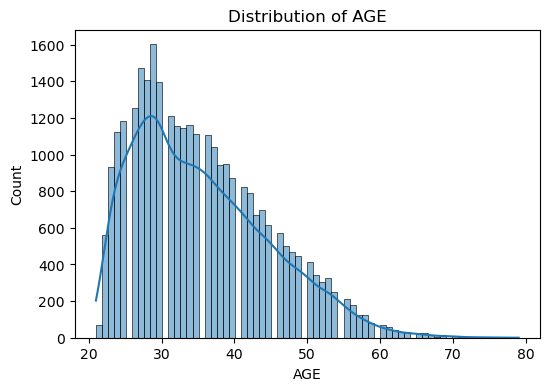

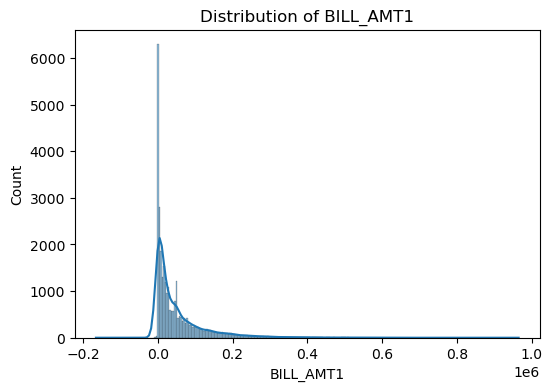

In [3]:
plot_univariate(df, 'LIMIT_BAL')
plot_univariate(df, 'AGE')
plot_univariate(df, 'BILL_AMT1')


## 3. Bivariate Analysis
Explore relationships between features and the target variable.


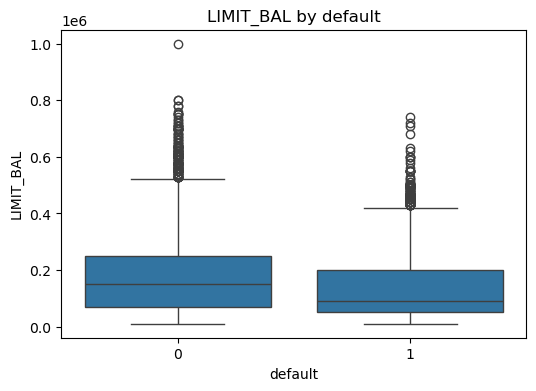

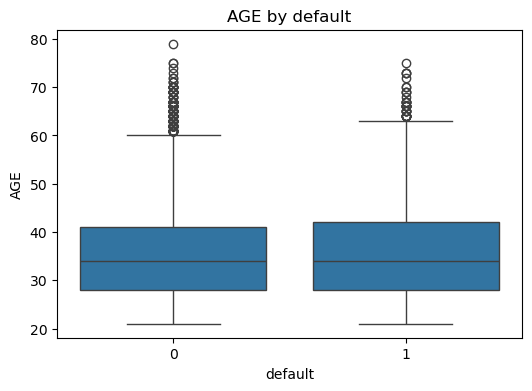

In [4]:
plot_bivariate(df, 'LIMIT_BAL', 'default')
plot_bivariate(df, 'AGE', 'default')


## 4. Correlation Analysis
Visualize the correlation matrix for all features.


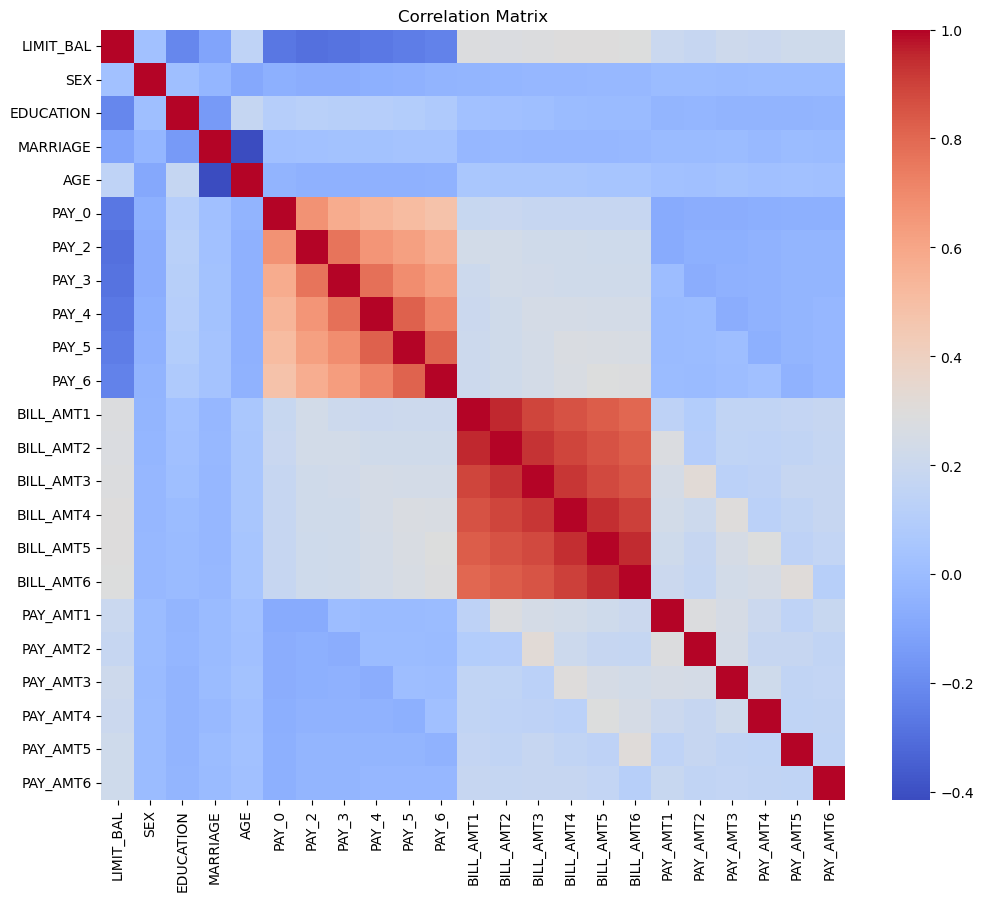

In [5]:
plot_correlation_matrix(df.drop(columns=['default']))


## 5. Outlier analysis



Outlier Analysis Summary:

Columns with most outliers:
     Column  Num_Outliers
23  default          6630
6     PAY_2          4409
7     PAY_3          4208
8     PAY_4          3507
5     PAY_0          3129


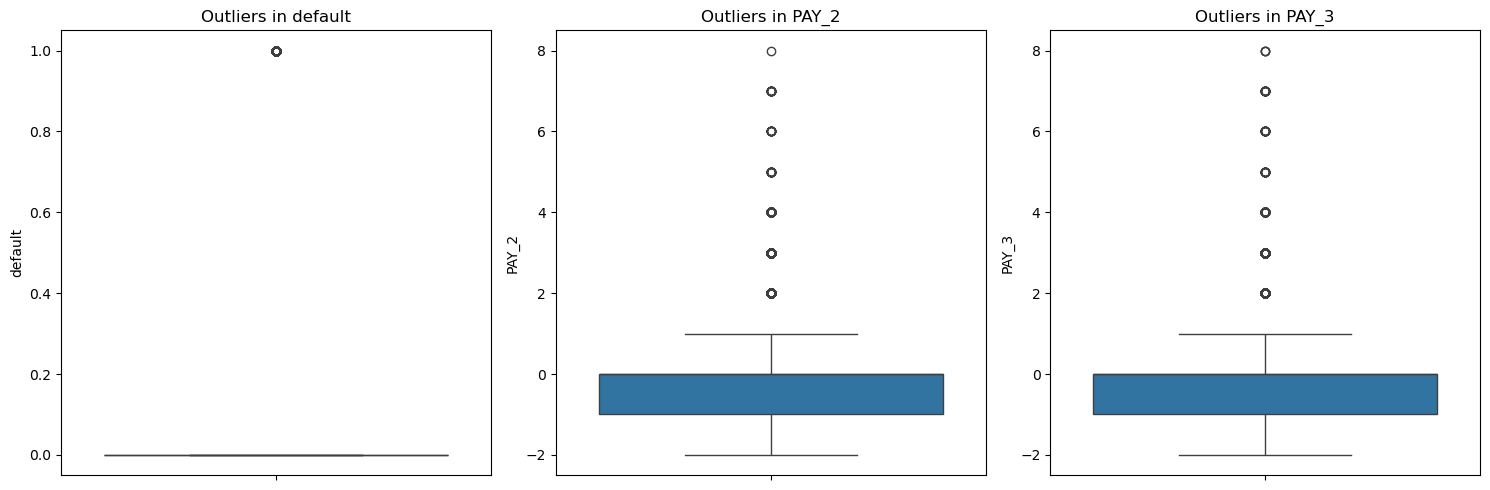


Percentage of outliers in each column:
       Column  Outlier_Percentage
23    default               22.13
6       PAY_2               14.71
7       PAY_3               14.04
8       PAY_4               11.70
5       PAY_0               10.44
10      PAY_6               10.27
20   PAY_AMT4                9.99
9       PAY_5                9.90
22   PAY_AMT6                9.88
21   PAY_AMT5                9.82
17   PAY_AMT1                9.15
15  BILL_AMT5                9.09
18   PAY_AMT2                9.09
16  BILL_AMT6                8.97
14  BILL_AMT4                8.73
19   PAY_AMT3                8.66
13  BILL_AMT3                8.24
12  BILL_AMT2                7.98
11  BILL_AMT1                7.96
2   EDUCATION                1.52
4         AGE                0.91
0   LIMIT_BAL                0.56
1         SEX                0.00
3    MARRIAGE                0.00


In [6]:
# Analyze outliers in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = pd.DataFrame(columns=['Column', 'Q1', 'Q3', 'IQR', 'Lower_Bound', 'Upper_Bound', 'Num_Outliers'])

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    outlier_summary.loc[len(outlier_summary)] = [
        col, Q1, Q3, IQR, lower_bound, upper_bound, num_outliers
    ]

# Sort by number of outliers descending
outlier_summary = outlier_summary.sort_values('Num_Outliers', ascending=False)

# Display summary
print("Outlier Analysis Summary:")
print("\nColumns with most outliers:")
print(outlier_summary[['Column', 'Num_Outliers']].head())

# Visualize outliers for top 3 columns with most outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_summary['Column'].head(3)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()

# Calculate percentage of outliers
total_rows = len(df)
outlier_summary['Outlier_Percentage'] = (outlier_summary['Num_Outliers'] / total_rows * 100).round(2)

print("\nPercentage of outliers in each column:")
print(outlier_summary[['Column', 'Outlier_Percentage']].to_string())


Summary statistics before cleaning:
       BILL_AMT1  BILL_AMT2   BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
count   29965.00   29965.00    29965.00   29965.00   29965.00   29965.00   
mean    51283.01   49236.37    47067.92   43313.33   40358.33   38917.01   
std     73658.13   71195.57    69371.35   64353.51   60817.13   59574.15   
min   -165580.00  -69777.00  -157264.00 -170000.00  -81334.00 -339603.00   
25%      3595.00    3010.00     2711.00    2360.00    1787.00    1262.00   
50%     22438.00   21295.00    20135.00   19081.00   18130.00   17124.00   
75%     67260.00   64109.00    60201.00   54601.00   50247.00   49252.00   
max    964511.00  983931.00  1664089.00  891586.00  927171.00  961664.00   

        PAY_AMT1    PAY_AMT2   PAY_AMT3   PAY_AMT4   PAY_AMT5   PAY_AMT6  
count   29965.00    29965.00   29965.00   29965.00   29965.00   29965.00  
mean     5670.10     5927.98    5231.69    4831.62    4804.90    5221.50  
std     16571.85    23053.46   17616.36   15674.46   1

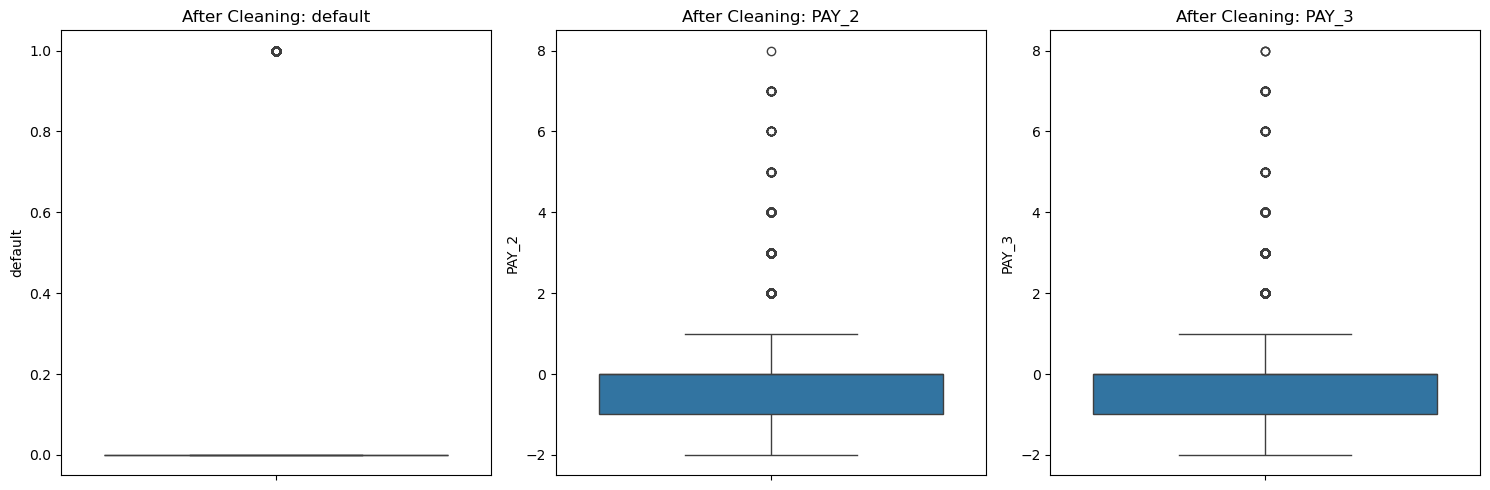

In [7]:
# Based on the outlier analysis, we can see that some columns have extreme outliers
# Let's handle outliers for columns with very high percentages while being mindful not to remove too much data

# Define threshold for extreme outliers (using 3 * IQR instead of 1.5 * IQR to be more conservative)
cleaned_df = df.copy()
columns_to_clean = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in columns_to_clean:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Cap the values instead of removing them
    cleaned_df[col] = cleaned_df[col].clip(lower=lower_bound, upper=upper_bound)

# Compare the statistics before and after cleaning
print("Summary statistics before cleaning:")
print(df[columns_to_clean].describe().round(2))
print("\nSummary statistics after cleaning:")
print(cleaned_df[columns_to_clean].describe().round(2))

# Visualize the effect of cleaning on the top 3 columns with most outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(outlier_summary['Column'].head(3)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=cleaned_df[col])
    plt.title(f'After Cleaning: {col}')
plt.tight_layout()
plt.show()

# Store both versions for later analysis
df_with_outliers = df.copy()
df = cleaned_df.copy()


## Key Insights

Based on the exploratory data analysis, here are the key findings:

### Distribution of Features
- Credit limit (LIMIT_BAL) shows a right-skewed distribution, with most customers having lower credit limits and fewer having very high limits
- Age distribution appears roughly normal, with most customers between 25-45 years old
- Bill amounts (BILL_AMT1) also show a right-skewed distribution, indicating most customers have moderate bills while some have very high bills

### Relationship with Default
- There appears to be a negative relationship between credit limit and default probability - customers with higher credit limits tend to default less often
- Age shows a weak relationship with default probability, suggesting it may not be a strong predictor on its own

### Feature Correlations
- Strong positive correlations exist between consecutive months of bill amounts (BILL_AMT1-6)
- Payment amounts (PAY_AMT1-6) also show moderate positive correlations with each other
- Payment status features (PAY_0-6) demonstrate moderate correlations, indicating some consistency in payment behavior over time
- Credit limit shows positive correlation with bill amounts, which is expected as higher limits enable larger bills

These insights suggest that payment history and credit utilization patterns may be important predictors of default risk, while demographic features like age may be less predictive.
